In [1]:
from sklearn import model_selection, svm
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import pandas as pd

In [2]:
X_train = pd.read_csv('C:/Users/Pablo/Desktop/IA-BD/MIA/Twitter/Twitter/datasets/x_train.csv')
Y_train = pd.read_csv('C:/Users/Pablo/Desktop/IA-BD/MIA/Twitter/Twitter/datasets/y_train.csv')
X_test = pd.read_csv('C:/Users/Pablo/Desktop/IA-BD/MIA/Twitter/Twitter/datasets/x_test.csv')
Y_test = pd.read_csv('C:/Users/Pablo/Desktop/IA-BD/MIA/Twitter/Twitter/datasets/y_test.csv')

X_train.drop(X_train.columns[0], axis=1, inplace=True)
Y_train.drop(Y_train.columns[0], axis=1, inplace=True)

X_train['text'] = X_train['text'].apply(lambda x: re.sub("@[A-Za-z0-9_]+","", x))
X_train['text'] = X_train['text'].apply(lambda x: re.sub(r"\s*{.*}\s*", " ", x))
X_train['text'] = X_train['text'].apply(lambda x: re.sub("#[A-Za-z0-9_]+","", x))
X_train['text'] = X_train['text'].apply(lambda x: re.sub(r'https\S+', '', x))
X_train['text'] = X_train['text'].apply(lambda x: re.sub(r'http\S+', '', x))


X_test.drop(X_test.columns[0], axis=1, inplace=True)
Y_test.drop(Y_test.columns[0], axis=1, inplace=True)

X_test['text'] = X_test['text'].apply(lambda x: re.sub("@[A-Za-z0-9_]+","", x))
X_test['text'] = X_test['text'].apply(lambda x: re.sub(r"\s*{.*}\s*", " ", x))
X_test['text'] = X_test['text'].apply(lambda x: re.sub("#[A-Za-z0-9_]+","", x))
X_test['text'] = X_test['text'].apply(lambda x: re.sub(r'https\S+', '', x))
X_test['text'] = X_test['text'].apply(lambda x: re.sub(r'http\S+', '', x))


print(X_train)
print(Y_train)

                                                   text
0     Acknowledging trans women as women DOES NOT er...
1     Spreading generosity this festive season and g...
2     . you really are the Bronze Bomber.  Fury was ...
3                                            Check out 
4     Listening to speak is so reassuring as a paren...
...                                                 ...
5725  start the 20-21 school year off POSITIVE! let’...
5726  The way one voice only vlive has the power to ...
5727  Tropical storm  is now outside the Philippine ...
5728  Oooh. So this is the story of  Ours , no wonde...
5729  I need one of them jerseys for Christmas man. ...

[5730 rows x 1 columns]
                         topic
0      celebrity_&_pop_culture
1        news_&_social_concern
2                       sports
3     business_&_entrepreneurs
4        news_&_social_concern
...                        ...
5725      diaries_&_daily_life
5726   celebrity_&_pop_culture
5727     news_&_social_c

In [3]:
vectorizer = TfidfVectorizer()
#cálculo de los TF-IDF para todos los términos de la colección
vectorizer.fit(X_train['text']) 
vectorizer.fit(X_test['text']) 
#convertir a valores numéricos TF-IDF los datos de entramiento
X_train_Tfidf = vectorizer.transform(X_train['text'])
SVM = svm.SVC(kernel='linear', gamma=0.0001, random_state=42, degree=12) # Definir el modelo SVM
SVM.fit(X_train_Tfidf,Y_train['topic']) # Fase de entrenamiento del modelo
X_test_Tfidf = vectorizer.transform(X_test['text']) #convertir a valores numéricos TF-IDF los datos de test. Fase de uso
resultado = SVM.predict(X_test_Tfidf) #uso
print(X_test['text'])
print(resultado)
print(Y_test['topic'])

0       Jesus Christ Superstar - FULL STAGE SHOW | The...
1       Trump says it&;s &;illegal&; for Pelosi to tea...
2       Sooo, this may be an unpopular opinion, but I ...
3       Stephen A. puts out an APB for Paul George - via 
4       Chindit  Etonian  Click for Richard s full Dew...
                              ...                        
5530    Long Island hockey goalie raising money for br...
5531             Stream is live!  $500 RalPup Cup  R1 vs 
5532    Love that - some amazing insights from inside ...
5533                                                 Via 
5534    freaking out cos im watching the new series of...
Name: text, Length: 5535, dtype: object
['film_tv_&_video' 'news_&_social_concern' 'news_&_social_concern' ...
 'celebrity_&_pop_culture' 'news_&_social_concern' 'film_tv_&_video']
0                arts_&_culture
1         news_&_social_concern
2                 food_&_dining
3                        sports
4                        sports
                 ... 

In [10]:
from deep_translator import GoogleTranslator

def predecir(tweet):
    tweet_eng = GoogleTranslator(source='auto', target='en').translate(tweet)
    prediction = SVM.predict(vectorizer.transform([tweet_eng]))
    if prediction[0] == 'gaming':
        return (tweet, prediction[0])
    return (tweet, GoogleTranslator(source='auto', target='es').translate(prediction[0].replace('_', ' ')))

print(predecir("No sé a qué partido político debería votar"))
print(predecir("El pádel en sin duda mi deporte favorito"))
print(predecir("Este álbum me parece un antes y un después, recomendadísimo"))
print(predecir("Me encanta jugar a la xbox con mis amigos"))
print(predecir("Los Chicago Bulls son un equipazo"))

('No sé a qué partido político debería votar', 'noticias y preocupación social')
('El pádel en sin duda mi deporte favorito', 'Deportes')
('Este álbum me parece un antes y un después, recomendadísimo', 'música')
('Me encanta jugar a la xbox con mis amigos', 'gaming')
('Los Chicago Bulls son un equipazo', 'Deportes')
('Microsoft está haciendo las cosas muy bien ultimamente, sobretodo en lo que a Inteligencia Artificial respecta', 'celebridad y cultura pop')


In [5]:
from sklearn.metrics import classification_report, accuracy_score


print(classification_report(Y_test['topic'], resultado))


                          precision    recall  f1-score   support

          arts_&_culture       0.53      0.20      0.29       267
business_&_entrepreneurs       0.50      0.14      0.22       258
 celebrity_&_pop_culture       0.36      0.48      0.41       754
    diaries_&_daily_life       0.34      0.34      0.34       574
                  family       0.57      0.06      0.11        64
         fashion_&_style       0.59      0.31      0.41        74
         film_tv_&_video       0.41      0.31      0.35       474
        fitness_&_health       0.66      0.12      0.21       185
           food_&_dining       0.57      0.13      0.21        61
                  gaming       0.70      0.09      0.16       158
  learning_&_educational       1.00      0.01      0.03        69
                   music       0.59      0.39      0.47       363
   news_&_social_concern       0.45      0.76      0.57      1078
           other_hobbies       0.00      0.00      0.00        72
         

c:\Users\Pablo\AppData\Local\pypoetry\Cache\virtualenvs\twitter-KWCxgcmc-py3.10\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pablo\AppData\Local\pypoetry\Cache\virtualenvs\twitter-KWCxgcmc-py3.10\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pablo\AppData\Local\pypoetry\Cache\virtualenvs\twitter-KWCxgcmc-py3.10\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. U

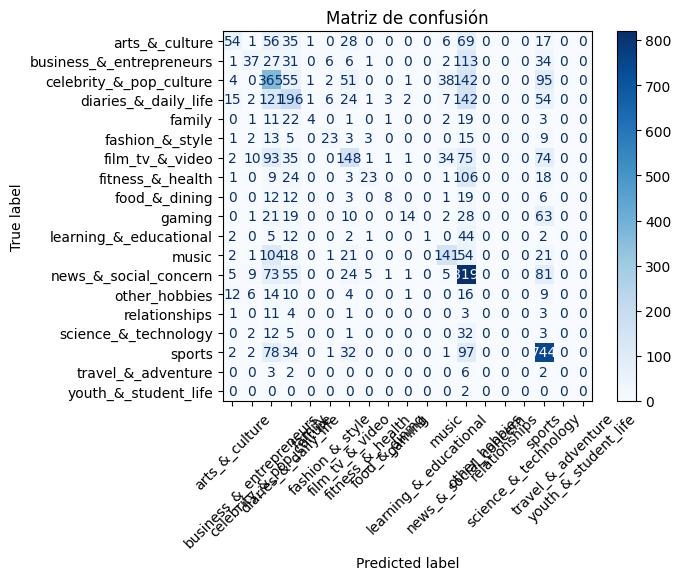

[[ 54   1  56  35   1   0  28   0   0   0   0   6  69   0   0   0  17   0
    0]
 [  1  37  27  31   0   6   6   1   0   0   0   2 113   0   0   0  34   0
    0]
 [  4   0 365  55   1   2  51   0   0   1   0  38 142   0   0   0  95   0
    0]
 [ 15   2 121 196   1   6  24   1   3   2   0   7 142   0   0   0  54   0
    0]
 [  0   1  11  22   4   0   1   0   1   0   0   2  19   0   0   0   3   0
    0]
 [  1   2  13   5   0  23   3   3   0   0   0   0  15   0   0   0   9   0
    0]
 [  2  10  93  35   0   0 148   1   1   1   0  34  75   0   0   0  74   0
    0]
 [  1   0   9  24   0   0   3  23   0   0   0   1 106   0   0   0  18   0
    0]
 [  0   0  12  12   0   0   3   0   8   0   0   1  19   0   0   0   6   0
    0]
 [  0   1  21  19   0   0  10   0   0  14   0   2  28   0   0   0  63   0
    0]
 [  2   0   5  12   0   0   2   1   0   0   1   0  44   0   0   0   2   0
    0]
 [  2   1 104  18   0   1  21   0   0   0   0 141  54   0   0   0  21   0
    0]
 [  5   9  73  55   0   0  2

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
labels = ["arts_&_culture","business_&_entrepreneurs","celebrity_&_pop_culture","diaries_&_daily_life","family","fashion_&_style","film_tv_&_video","fitness_&_health","food_&_dining","gaming","learning_&_educational","music","news_&_social_concern","other_hobbies","relationships","science_&_technology","sports","travel_&_adventure","youth_&_student_life"]
# SVM ya debe estar entrenado
disp = ConfusionMatrixDisplay.from_estimator(SVM,vectorizer.transform(X_test['text']),Y_test['topic'],display_labels=labels,cmap=plt.cm.Blues, xticks_rotation=45)
disp.ax_.set_title("Matriz de confusión")
plt.rcParams["figure.figsize"] = (20,16)
plt.show()
print(disp.confusion_matrix)